# Gender Classificaton


## Imports

In [40]:
import os
import sys
from scrape import get_remote_tgz_files, download_extract_files
from parse import paths, parse_readme
from pathlib import Path
import sqlite3
import librosa
import librosa.display
import IPython.display
import numpy

## Input variables

In [4]:
SOURCE_URL = '''http://www.repository.voxforge1.org/downloads/SpeechCorpus/Trunk/Audio/Main/16kHz_16bit/'''
DATA_DIR = '''data'''
DB = '''genderclass.db'''

## Scrape data
Only files not already downloaded and extracted will be fetched.

In [3]:
data_folder = Path(DATA_DIR)
urls = get_remote_tgz_files(SOURCE_URL)
download_extract_files(urls, data_folder)

## Create DB to hold features

In [ ]:
conn = sqlite3.connect(DB)
db = conn.cursor()
db.execute('''DROP TABLE IF EXISTS features''')
db.execute('''CREATE TABLE features
         (file text unique, path text, female integer, 
            age text, language text, dialect text)''')
conn.commit()
conn.close()

## Extract features
Silence trimmed at beginning and end of each file.

MFCC extracted (with default librosa settings).

Save into database.

['b0483.wav', 'b0487.wav', 'b0490.wav', 'b0489.wav', 'b0485.wav', 'b0491.wav', 'b0486.wav', 'b0488.wav', 'b0482.wav', 'b0484.wav']
(20, 176)
(20, 286)
(20, 137)
(20, 235)
(20, 180)
(20, 172)
(20, 208)
(20, 141)
(20, 293)
(20, 227)


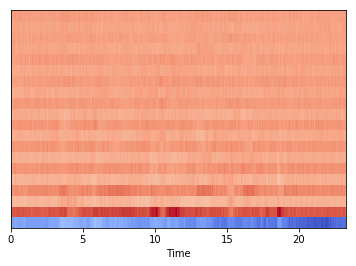

In [42]:
data_folder = Path(DATA_DIR)
conn = sqlite3.connect(DB)
db = conn.cursor()
samples = os.listdir(data_folder)

for sample in samples:
    (wav_folder, readme_path) = paths(data_folder, sample)
    meta = parse_readme(readme_path)
    
    wavs = os.listdir(wav_folder)
    print(wavs)
    for wav in wavs:
        y, fs = librosa.load(wav_folder / wav, sr=None)
        y, idx = librosa.effects.trim(y)
        mfcc = librosa.feature.mfcc(y, fs)
        
        db.execute('''INSERT INTO features VALUES
         (?,?,?,?,?,?)''', 
            (wav[:-4], 
            str(wav_folder), 
            meta['Gender'] == 'Female', 
            meta['Age Range'], 
            meta['Language'], 
            meta['Pronunciation dialect']))

    #db.execute('''SELECT file, female, age, language, dialect FROM features''')
    #print(db.fetchall())
    break

conn.commit()
conn.close()

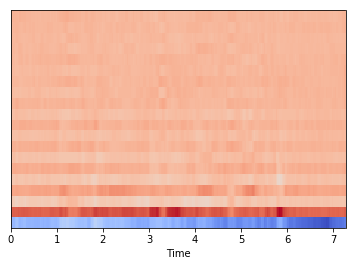

In [44]:
## Possibly rewisit narrower frames:
spec = librosa.feature.melspectrogram(y=y, sr=fs, S=None, n_fft=400, hop_length=160, power=2.0)
mfcc1 = librosa.feature.mfcc(y, fs, S=numpy.log(spec))

librosa.display.specshow(mfcc1, sr=fs, x_axis='time', hop_length=160)
librosa.display.specshow(mfcc2, sr=fs, x_axis='time')

#IPython.display.Audio(y, rate=fs)